### Machine Learning Notebook - Baseline models
We will compared the performance of Graph Neural Network with some baseline classification models, including ensembling learning like random forest or Adaboosting algorithm, Support Vector Machine, and K-nearest Neighbor

In [48]:
# Import nesscery libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
from scipy.stats import randint

In [2]:
# Import data
path  =  'Data/adjusted_users.csv'
df = pd.read_csv(path)

C:\Users\wue77\AppData\Local\Temp\ipykernel_31184\1692147877.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [3]:
df.shape

(1000000, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'created_at', 'description', 'entities', 'id', 'location',
       'name', 'pinned_tweet_id', 'profile_image_url', 'protected',
       'public_metrics', 'url', 'username', 'verified', 'withheld', 'label',
       'follower_count', 'following_count', 'tweet_count', 'listed_count',
       'year_created', 'description_True', 'description_False',
       'entities_True', 'entities_False', 'location_True', 'location_False',
       'protected_True', 'protected_False', 'url_True', 'url_False',
       'verified_True', 'verified_False', 'withheld_True', 'withheld_False',
       'bot_True', 'bot_False'],
      dtype='object')

In [5]:
new_df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
new_df.head(5)

,created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,...,protected_True,protected_False,url_True,url_False,verified_True,verified_False,withheld_True,withheld_False,bot_True,bot_False
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u1217628182611927040,"Cambridge, MA",Boaz Barak,NaN,https://pbs.twimg.com/profile_images/125226236...,False,"{'followers_count': 7316, 'following_count': 2...",...,0,1,1,0,0,1,1,0,0,1
1,2014-07-02 17:56:46+00:00,creative _,NaN,u2664730894,🎈,olawale 💨,NaN,https://pbs.twimg.com/profile_images/147837638...,False,"{'followers_count': 123, 'following_count': 10...",...,0,1,0,1,0,1,1,0,0,1
2,2020-05-30 12:10:45+00:00,👽,NaN,u1266703520205549568,NaN,panagiota_.b,NaN,https://pbs.twimg.com/profile_images/142608606...,False,"{'followers_count': 3, 'following_count': 62, ...",...,0,1,0,1,0,1,1,0,0,1
3,2019-01-26 13:52:49+00:00,mama to maya. ABIM research pathway fellow @UV...,"{'description': {'mentions': [{'start': 43, 'e...",u1089159225148882949,"Charlottesville, VA","Jacqueline Hodges, MD MPH",NaN,https://pbs.twimg.com/profile_images/130229171...,False,"{'followers_count': 350, 'following_count': 57...",...,0,1,0,1,0,1,1,0,0,1
4,2009-04-30 19:01:42+00:00,Father / SWT Alumnus / Longhorn Fan,NaN,u36741729,United States,Matthew Stubblefield,NaN,https://pbs.twimg.com/profile_images/145808462...,True,"{'followers_count': 240, 'following_count': 29...",...,1,0,0,1,0,1,1,0,1,0


In [7]:
# Created training and testing set. 
features = ['follower_count', 'following_count', 'tweet_count', 'listed_count',
       'year_created', 'description_True', 'description_False',
       'entities_True', 'entities_False', 'location_True', 'location_False',
       'protected_True', 'protected_False', 'url_True', 'url_False',
       'verified_True', 'verified_False', 'withheld_True', 'withheld_False']

X = new_df.loc[:, features]
y = new_df.loc[:, ['bot_True']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600000, 19)
(400000, 19)
(600000, 1)
(400000, 1)


In [9]:
# Scaled the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

#### Random Forest Classifier

In [30]:
# Hyper-parameter Tuning
RFC_tune = RandomForestClassifier()
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1,20)
}

rand_search = RandomizedSearchCV(RFC_tune, param_distributions= param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train.values.ravel())
rand_search.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=156)

In [10]:
RFC = RandomForestClassifier(n_estimators= 156, max_depth= 15, random_state=42, n_jobs=-1)
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=15, n_estimators=156, n_jobs=-1,
                       random_state=42)

In [11]:
predicted = RFC.predict(X_test)
cm = confusion_matrix(y_test.values.ravel(), predicted)

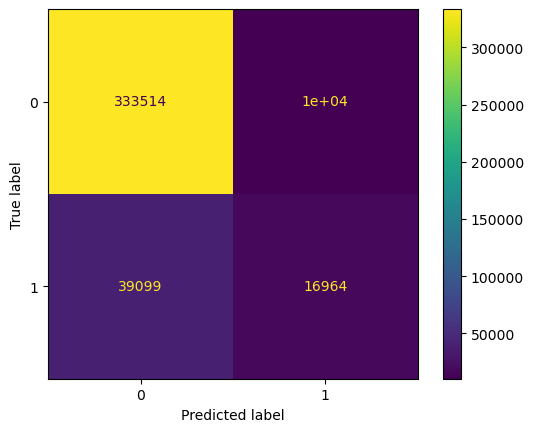

In [12]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
cm_display.plot()
plt.show()

In [13]:
RFC_accuracy = accuracy_score(y_test.values.ravel(), predicted)
RFC_F1 = f1_score(y_test.values.ravel(), predicted)
print(f' The accuracy score of RFC: {RFC_accuracy}', "\n",  
      f'The F1 score of RFC: {RFC_F1}')

 The accuracy score of RFC: 0.876195 
 The F1 score of RFC: 0.4065668064709407


In [14]:
RFC.feature_importances_.round(2)

array([0.25, 0.13, 0.17, 0.07, 0.05, 0.13, 0.14, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.  ])

In [18]:
importance = RFC.feature_importances_.round(2)
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

importance_df.sort_values(by=['Importance'])
print(importance_df)

              Feature  Importance
0      follower_count        0.25
1     following_count        0.13
2         tweet_count        0.17
3        listed_count        0.07
4        year_created        0.05
5    description_True        0.13
6   description_False        0.14
7       entities_True        0.01
8      entities_False        0.01
9       location_True        0.01
10     location_False        0.01
11     protected_True        0.01
12    protected_False        0.01
13           url_True        0.00
14          url_False        0.01
15      verified_True        0.01
16     verified_False        0.01
17      withheld_True        0.00
18     withheld_False        0.00


#### AdaBoost Classifier

In [29]:
# Hyper parameter Tuning
ADA_tune = AdaBoostClassifier(algorithm= 'SAMME')

param_grid = {
    "n_estimators": [i for i in range(2,13,1)],
    "learning_rate": [(0.97 + x / 100) for x in range(0,8)]
}

ADA_gscv = GridSearchCV(ADA_tune, param_grid, cv=5, n_jobs=-1)
ADA_gscv.fit(X_train, y_train.values.ravel())
ADA_gscv.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.97, n_estimators=5)

In [19]:
ADA = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.97, n_estimators= 5, random_state=42)
ADA.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.97, n_estimators=5,
                   random_state=42)

In [20]:
predicted = ADA.predict(X_test)
cm = confusion_matrix(y_test.values.ravel(), predicted)

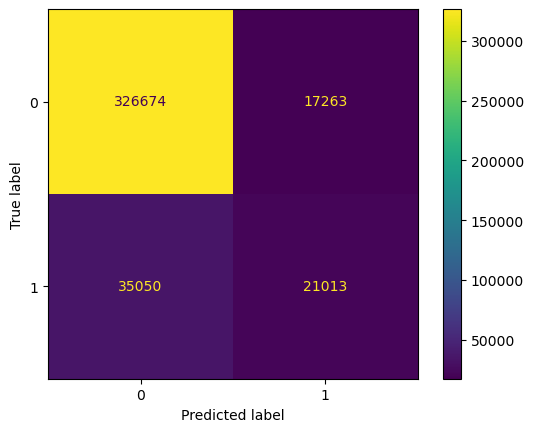

In [21]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
cm_display.plot()
plt.show()

In [22]:
ADA_accuracy = accuracy_score(y_test.values.ravel(), predicted)
ADA_F1 = f1_score(y_test.values.ravel(), predicted)
print(f' The accuracy score of RFC: {ADA_accuracy}', "\n",  
      f'The F1 score of RFC: {ADA_F1}')

 The accuracy score of RFC: 0.8692175 
 The F1 score of RFC: 0.445478540158365


#### KNN Classifier

In [23]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_scaled, y_train.values.ravel())

KNeighborsClassifier(n_jobs=-1)

In [18]:
scores = cross_val_score(knn, X_test, y_test.values.ravel(), cv=5)
scores

array([0.8460375, 0.843675 , 0.8453125, 0.844625 , 0.8464125])

In [24]:
predicted = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test.values.ravel(), predicted)

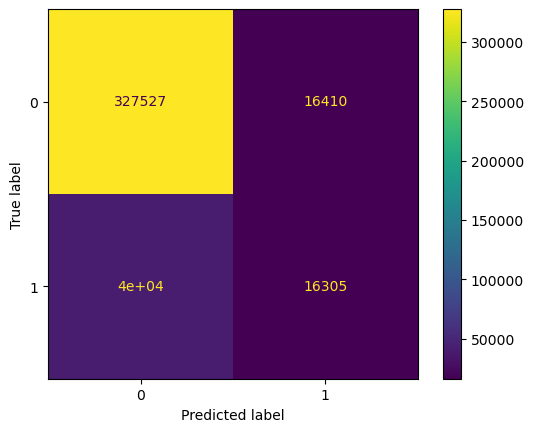

In [25]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
cm_display.plot()
plt.show()

In [26]:
knn_accuracy = accuracy_score(y_test.values.ravel(), predicted)
knn_F1 = f1_score(y_test.values.ravel(), predicted)
print(f' The accuracy score of RFC: {knn_accuracy}', "\n",  
      f'The F1 score of RFC: {knn_F1}')

 The accuracy score of RFC: 0.85958 
 The F1 score of RFC: 0.3673207326139359


#### Support Vector Machine

In [28]:
# Try using linear kernal first because it's not that computational demanding. 
SVM = svm.LinearSVC(random_state=42)
SVM.fit(X_train_scaled, y_train.values.ravel())

LinearSVC(random_state=42)

In [29]:
predicted = SVM.predict(X_test_scaled)
cm = confusion_matrix(y_test.values.ravel(), predicted)

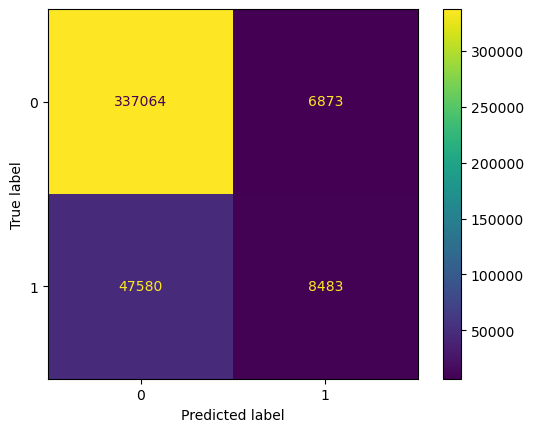

In [30]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
cm_display.plot()
plt.show()

In [31]:
SVM_accuracy = accuracy_score(y_test.values.ravel(), predicted)
SVM_F1 = f1_score(y_test.values.ravel(), predicted)
print(f' The accuracy score of RFC: {SVM_accuracy}', "\n",  
      f'The F1 score of RFC: {SVM_F1}')

 The accuracy score of RFC: 0.8638675 
 The F1 score of RFC: 0.23755583248155251


#### Compare the Result

In [45]:
accuracy_df = pd.DataFrame({
    'RFC_Accuracy': RFC_accuracy,
    'ADA_Accuracy': ADA_accuracy,
    'KNN_Accuracy': knn_accuracy,
    'SVM_Accuracy': SVM_accuracy
}, index=[0])

print(accuracy_df)

   RFC_Accuracy  ADA_Accuracy  KNN_Accuracy  SVM_Accuracy
0      0.876195      0.869217       0.85958      0.863868


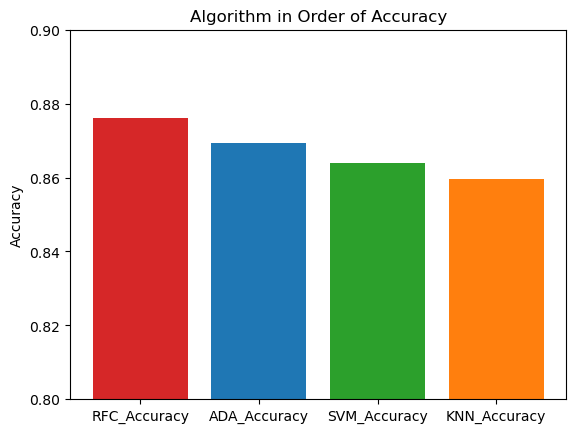

In [53]:
fig, ax = plt.subplots()

x_axis = list(accuracy_df.columns)
y_axis = accuracy_df.values.tolist()[0]

sorted_indices = np.argsort(y_axis)[::-1]
x_axis = np.array(x_axis)[sorted_indices]
y_axis = np.array(y_axis)[sorted_indices]

bar_labels = ['RFC', 'ADA', 'SVM', 'KNN']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_axis, y_axis, label=bar_labels, color=bar_colors)

ax.set_ylabel('Accuracy')
ax.set_title('Algorithm in Order of Accuracy')

plt.ylim(0.8, 0.9)

plt.show()

In [35]:
F1_df = pd.DataFrame({
    'RFC_F1': RFC_F1,
    'ADA_F1': ADA_F1,
    'KNN_F1': knn_F1,
    'SVM_F1': SVM_F1
}, index=[0])

print(F1_df)

     RFC_F1    ADA_F1    KNN_F1    SVM_F1
0  0.406567  0.445479  0.367321  0.237556


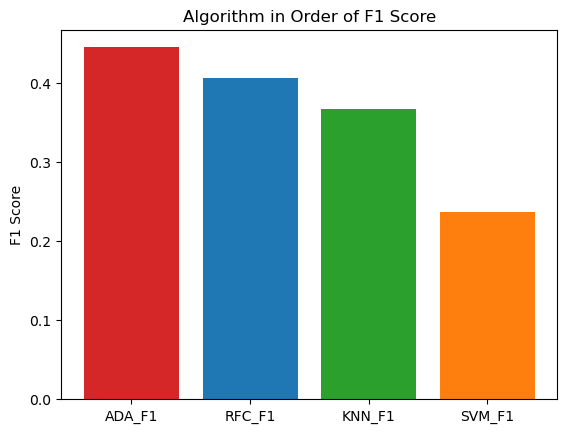

In [54]:
fig, ax = plt.subplots()

x_axis = list(F1_df.columns)
y_axis = F1_df.values.tolist()[0]

sorted_indices = np.argsort(y_axis)[::-1]
x_axis = np.array(x_axis)[sorted_indices]
y_axis = np.array(y_axis)[sorted_indices]

bar_labels = ['RFC', 'ADA', 'SVM', 'KNN']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(x_axis, y_axis, label=bar_labels, color=bar_colors)

ax.set_ylabel('F1 Score')
ax.set_title('Algorithm in Order of F1 Score')

plt.show()